# Importing Dependencies

In [1]:
# from azureml.core import Workspace
import pandas as pd
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.orm import sessionmaker
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os

# Loading Data

In [2]:
data = pd.read_csv('insurance_claims.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [4]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

Data Exploration

In [5]:
data.drop(['_c39'], axis=1, inplace=True)

In [6]:
data.head(4).T

,0,1,2,3
months_as_customer,328,228,134,256
age,48,42,29,41
policy_number,521585,342868,687698,227811
policy_bind_date,2014-10-17,2006-06-27,2000-09-06,1990-05-25
policy_state,OH,IN,OH,IL
policy_csl,250/500,250/500,100/300,250/500
policy_deductable,1000,2000,2000,2000
policy_annual_premium,1406.91,1197.22,1413.14,1415.74
umbrella_limit,0,5000000,5000000,6000000
insured_zip,466132,468176,430632,608117


In [7]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
df = data[["months_as_customer", "age", "policy_deductable", "umbrella_limit", "capital-gains", "capital-loss", "incident_hour_of_the_day", "number_of_vehicles_involved",
        "bodily_injuries", "witnesses", "total_claim_amount", "injury_claim", "property_claim", "vehicle_claim", "fraud_reported"]]

In [9]:
# Assign X (data) and y (target)
X = df.drop('fraud_reported', axis=1)

y = df ["fraud_reported"]
print(X.shape, y.shape)

(1000, 14) (1000,)


In [154]:
# feature_names = X.columns

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


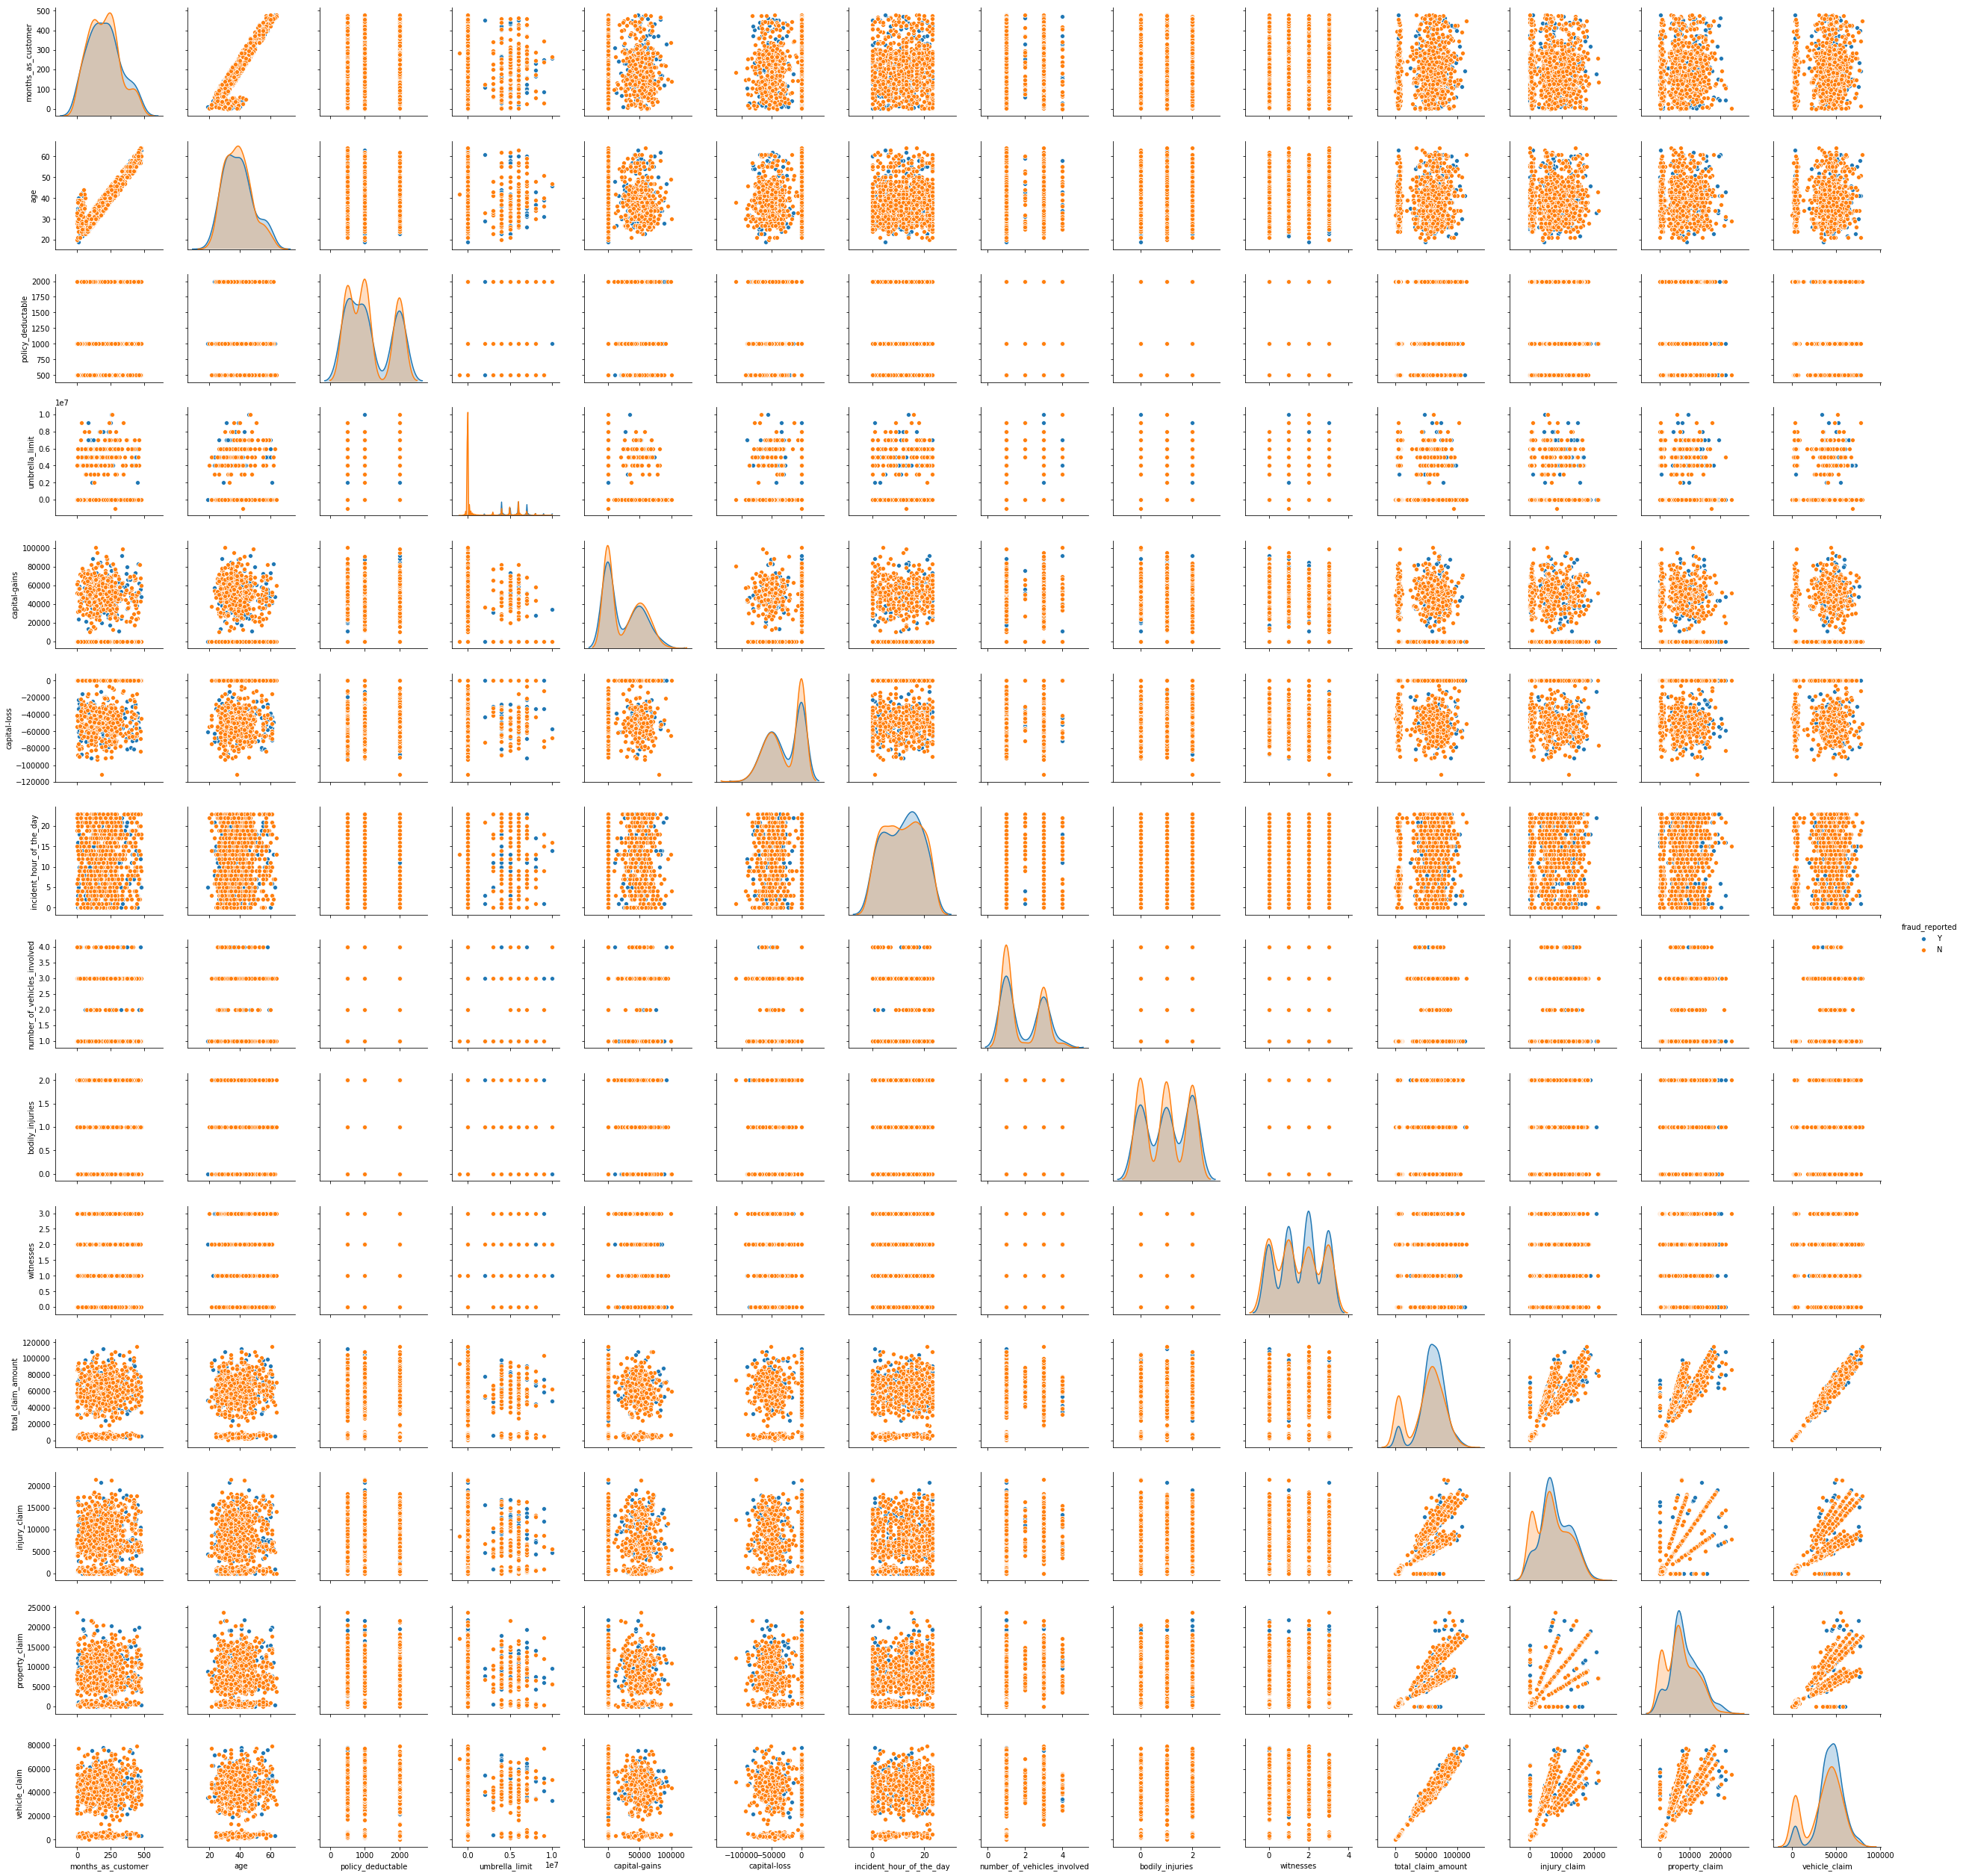

In [33]:
sb.pairplot(df, hue='fraud_reported', size=2.5);

## Logistic Regression Model

In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='sag')
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(classifier, X, y, cv=5, scoring='accuracy').mean()

c:\users\cheikh_moctar\documents\ucf_bootcamp\ripos_git\class_repo\env\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\cheikh_moctar\documents\ucf_bootcamp\ripos_git\class_repo\env\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\cheikh_moctar\documents\ucf_bootcamp\ripos_git\class_repo\env\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\cheikh_moctar\documents\ucf_bootcamp\ripos_git\class_repo\env\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

0.7529999999999999

In [158]:
df2 = data.drop(['policy_number','incident_location','policy_bind_date', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year'], axis=1)

In [159]:
g = df2.columns.to_series().groupby(df2.dtypes).groups
g

{dtype('int64'): Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
        'insured_zip', 'capital-gains', 'capital-loss',
        'incident_hour_of_the_day', 'number_of_vehicles_involved',
        'bodily_injuries', 'witnesses', 'total_claim_amount'],
       dtype='object'),
 dtype('float64'): Index(['policy_annual_premium'], dtype='object'),
 dtype('O'): Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
        'insured_occupation', 'insured_hobbies', 'insured_relationship',
        'incident_date', 'incident_type', 'collision_type', 'incident_severity',
        'authorities_contacted', 'incident_state', 'incident_city',
        'property_damage', 'police_report_available', 'fraud_reported'],
       dtype='object')}

In [160]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
# ohe.fit_transform(data[['insured_sex']])
x = df2.drop('fraud_reported', axis='columns')
x.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,Police,SC,Columbus,5,1,YES,1,2,YES,71610
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,Police,VA,Riverwood,8,1,?,0,0,?,5070
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,Police,NY,Columbus,7,3,NO,2,3,NO,34650
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,Police,OH,Arlington,5,1,?,1,2,NO,63400
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,None,NY,Arlington,20,1,NO,0,1,NO,6500


In [161]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, stratify=y)

In [162]:
trans_col = ['policy_state', 'policy_csl', 'insured_sex',
        'insured_education_level', 'insured_occupation', 'insured_hobbies',
        'insured_relationship', 'incident_date', 'incident_type',
        'collision_type', 'incident_severity', 'authorities_contacted',
        'incident_state', 'incident_city','property_damage', 'police_report_available']

In [163]:
from sklearn.compose import make_column_transformer
column_tranf = make_column_transformer((OneHotEncoder(sparse=False), trans_col), remainder='passthrough')
column_tranf.fit_transform(x_train)

array([[0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 2.000e+00,
        5.420e+04],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 2.000e+00,
        5.436e+04],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        7.660e+04],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 2.000e+00,
        5.368e+04],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 2.000e+00,
        4.779e+04],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 1.000e+00,
        6.000e+04]])

In [164]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(column_tranf, classifier)

In [165]:
cross_val_score(pipe, x_train, y_train, cv=5, scoring='accuracy').mean()

c:\users\cheikh_moctar\documents\ucf_bootcamp\ripos_git\class_repo\env\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\cheikh_moctar\documents\ucf_bootcamp\ripos_git\class_repo\env\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\cheikh_moctar\documents\ucf_bootcamp\ripos_git\class_repo\env\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\cheikh_moctar\documents\ucf_bootcamp\ripos_git\class_repo\env\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

0.7533333333333333

In [166]:
pipe.fit(x_train, y_train)

c:\users\cheikh_moctar\documents\ucf_bootcamp\ripos_git\class_repo\env\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['policy_state', 'policy_csl',
                                                   'insured_sex',
                                                   'insured_education_...
                                         

In [167]:
pipe.predict(x_test)

array(['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N

In [168]:
classifier.fit(X_train, y_train)

c:\users\cheikh_moctar\documents\ucf_bootcamp\ripos_git\class_repo\env\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [169]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7533333333333333
Testing Data Score: 0.752


In [170]:
# from sklearn.svm import SVC 
# model = SVC(kernel='linear')
# model.fit(X_train, y_train)
# Model Accuracy
# print('Test Acc: %.3f' % model.score(X_test, y_test))

# Decision Tree Model

In [171]:
# Using Decision Tree Model
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.596

In [173]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
feature_names = x.columns

In [174]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.11814374243094422, 'capital-gains'),
 (0.11618350191354919, 'insured_occupation'),
 (0.11022087137287041, 'insured_relationship'),
 (0.10586616038121395, 'insured_hobbies'),
 (0.10536028375305971, 'months_as_customer'),
 (0.08347685620460987, 'age'),
 (0.07616840430217807, 'umbrella_limit'),
 (0.06506145614354161, 'policy_deductable'),
 (0.05925145074986893, 'policy_annual_premium'),
 (0.04395002033299941, 'insured_education_level'),
 (0.03241936388576371, 'policy_csl'),
 (0.02930886460212412, 'insured_sex'),
 (0.027326270325698475, 'insured_zip'),
 (0.02726275360157842, 'policy_state')]

# Neural Network

In [175]:
from sklearn.model_selection import train_test_split

x_train, y_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [178]:
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler().fit(X_train)

In [5]:
import tensorflow

In [ ]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical